# for differnt values of theta

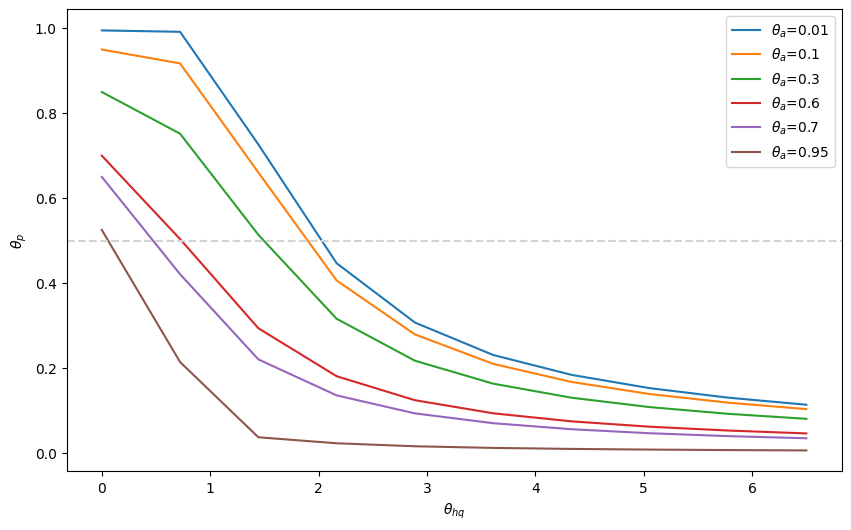

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of thetahq values
thetahq_values = np.linspace(0, 6.5, 10)

# Define the range of thetaa values
thetaa_values = [0.01, 0.1, 0.3, 0.6, 0.7, 0.95]

def H(x):
    if x < 0:
        return 0
    else:
        return 1

def thetap(thetahq, thetaa):
    x = np.arctan(thetahq - 1)
    return (1 - thetaa) - 2/ np.pi * x * ((1 - thetaa) * H(x)  + thetaa * H(-x))

# Plot for different values of thetaa
plt.figure(figsize=(10, 6))
for thetaa in thetaa_values:
    thetap_values = []  # Initialize thetahp_values for each thetaa
    for thetahq in thetahq_values:
        thetap_values.append(thetap(thetahq, thetaa))
    plt.plot(thetahq_values, thetap_values, label=f'$\\theta_a$={thetaa}')

plt.xlabel('$\\theta_{hq}$')
plt.ylabel('$\\theta_p$')
plt.axhline(y=0.5, xmin=0, xmax=7, ls='--',color='lightgrey')
plt.legend()
#plt.grid(True)
plt.show()


# simulation fro the same blooming time

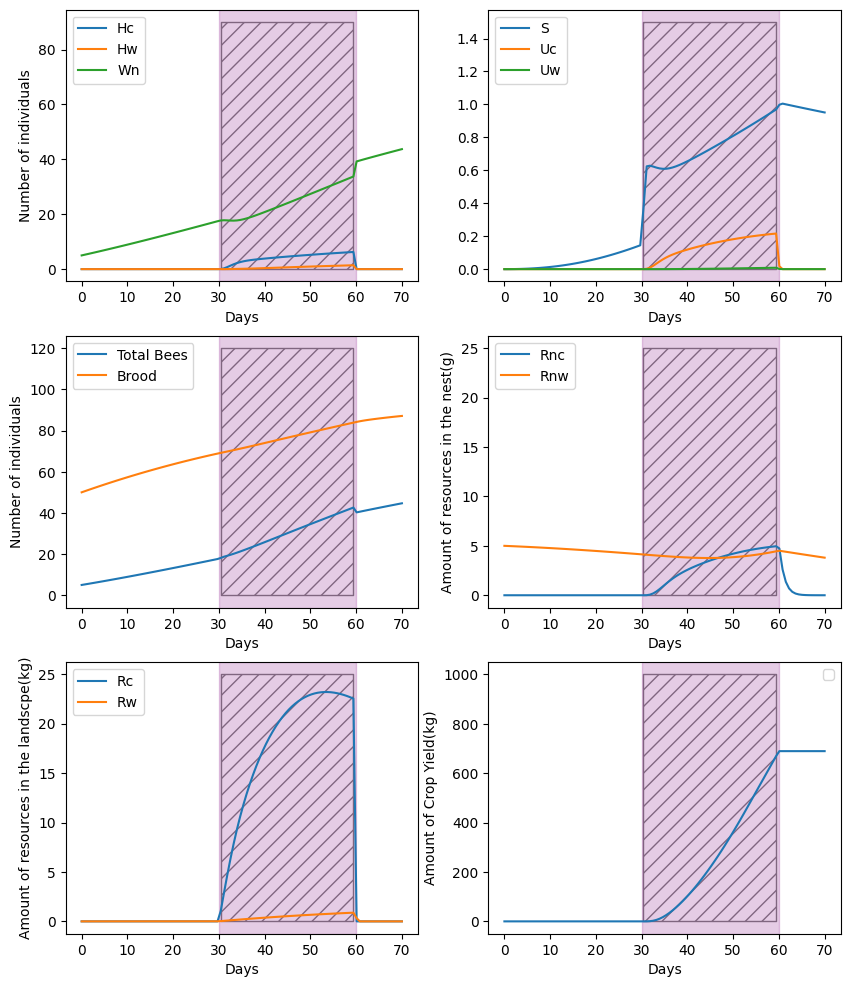

In [2]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import warnings
warnings.filterwarnings('ignore')

Tc_set = [30,60]; Tw_set = [30,60]
#for Tc in Tc_set:
def zcpb(t):
    if t > Tc_set[1]:
        return 10e3
    else:
        return 0
def zwpb(t):
    if t > Tw_set[1]:
        return 10
    else:
        return 0
def barrhoc(t):
    if Tc_set[0]<= t <= Tc_set[1]:
        return rhoc;
    else:
        return 0
def barrhow(t):
    if Tw_set[0]<= t <= Tw_set[1]:
        return rhow*(eps+1)
    else:
        return rhow*eps

def H(x):
    if x < 0:
        return 0
    else:
        return 1

def thetap_function(thetahq, thetaa):  # Renamed the function to thetap_function
    x = np.arctan(thetahq - 1)
    return (1 - thetaa) - 2/ np.pi * x * ((1 - thetaa) * H(x)  + thetaa * H(-x))


def FVmay(Hc, Rc):
    return integrate.quad(lambda t: mu * kHU * Rc / (Rc + KHUf) * Hc * ds / rhoc, Tc_set[0], Tc_set[1])[0]

def PSmay(FVmay, nf):
    thetap_value = thetap_function(thetahq, thetaa)  # Evaluate the function
    if FVmay / nf < A * (1 - thetap_value) * ds:
        return FVmay / nf
    else:
        return A * (1 - thetap_value) * ds

# Use the time-dependent function for Wn in the differential equation



def Herani(x, t):
    thetap_value = thetap_function(thetahq, thetaa)  # Renamed the variable to avoid conflict
    # Extract the variables
    Hc, Hw, S, Uc, Uw, Wn, B, Rnc, Rnw, Rc, Rw, TC = x

    dHc = kSH*(thetap_value*Rc)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - kHU*(Rc)/(Rc+KHUf)*Hc - sigmaH*Hc - 100*(t>Tc_set[1])*Hc
    dHw = kSH*((1-thetap_value)*Rw)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - thetah*kHU*(Rw)/(Rw+KHUf)*Hw - sigmaH*Hw + - 100*(t>Tw_set[1])*Hw
    dS = 10*kWnS*((thetap_value*Rc)/(Rc+KWnSf)*(1)/(1+Rnc/KWnSnf) + ((1-thetap_value)*Rw)/(Rw + KWnSf)*(1)/(1+Rnw/KWnSnf))*Wn -8*kSH*(thetap_value*Rc+(1-thetap_value)*Rw)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - sigmaS*S
    dUc = kHU*(Rc)/(Rc+KHUf)*Hc - kUWn*Uc - sigmaU*Uc
    dUw = thetah * kHU*(Rw)/(Rw+KHUf)*Hw - kUWn*Uw - sigmaU*Uw
    dWn = 2*kBWn*B + kUWn*(Uc+Uw) - (sigmaWn + sigmaRn*(1)/(1+(Rnc+thetaq*Rnw)/Kn))*Wn - kWnS*(thetap_value*Rc/(Rc + KWnSf)*1/(1+Rnc/KWnSf)+((1-thetap_value)*Rw)/(Rw+KWnSf)*1/(1+Rnw/KWnSnf))*Wn + 100*(t>Tc_set[1])*Hc + - 100*(t>Tw_set[1])*Hw;
    dB = 2*rhoB*(Rnc + Rnw)/(Rnc + Rnw+KBnf) - 2*kBWn*B - (sigmaB + sigmaRn*(1)/(1+(Rnc + thetaq*Rnw)/Kn))*B
    dRnc = 1*mu*kUWn*Uc - 1*sigmaWnc*(Rnc)/(Rnc + KWnBnf)*Wn - 200*sigmaBc*(Rnc)/(Rnc + KWnBnf)*B
    dRnw = mu*kUWn*Uw - 1*sigmaWnw*(Rnw)/(Rnw + KWnBnf)*Wn - 1*sigmaBw*(Rnw)/(Rnw + KWnBnf)*B
    dRc = 8*barrhoc(t) - 320*(mu)/((1-thetaa)*A)*kHU*(Rc)/(Rc+KHUf)*Hc - 1*(sigmac+zcpb(t))*Rc
    dRw = barrhow(t) - 1*(mu)/(thetaa*A)*kHU*thetah*(Rw)/(Rw+KHUf)*Hw - 1*(sigmaw+zwpb(t))*Rw
    dTC = wf * fs * PSmay(FVmay(Hc, Rc), nf)
    return [dHc, dHw, dS, dUc, dUw, dWn, dB, dRnc, dRnw, dRc, dRw, dTC]


# Define the parameter values
mu=0.75; nf=1; wf=2; fs=0.00005; ds=1000;

# k's
kWnS=1.3; kSH=19.6; kHU = 1.5;kUWn = 24.9; kBWn = 4e-3;

# Rho's
rhoB = 0.79; rhoc = 0.330 ; rhow = 0.040; eps=0.01;

#sigma's
sigmaWn = 1.5e-3; sigmaS =2*3e-3; sigmaH = 3e-3; sigmaU = 3e-3; sigmaB = 0.7e-3;
sigmaRn = 9.2e-3; sigmac = 20e-3; sigmaw = 20e-3; sigmaWnc = 8.3e-3 ; sigmaWnw =8.3e-3;
sigmaBc =1.3e-3; sigmaBw = 1.3e-3;

A = 600
# kf's
KWnSf = 57.2 ; KSHf = 24.4; KHUf = 16.7 ; KBnf= 0.6;
KWnSnf = 17.1; KWnBnf = 22.5; Kn = 7.1;
thetaa=0.1 ; thetah=2 ; thetaq = 2;

thetahq = 2
# Define the initial conditions
Hc0 = 0
Hw0 = 0
S0 = 0
Uc0 = 0
Uw0 = 0
Wn0 = 5
B0 = 50
Rnc0 = 0
Rnw0 = 5
Rc0 = 0
Rw0 = 0
TC0 = 0
X0 = [Hc0, Hw0, S0, Uc0, Uw0, Wn0, B0, Rnc0, Rnw0, Rc0, Rw0, TC0]

# Set up the time span
t_start = 0
t_end = 70
tspan = np.linspace(t_start, t_end, 100)

X = odeint(Herani, X0, tspan)

# Extract the solution
Hc = X[:, 0]
Hw = X[:, 1]
S = X[:, 2]
Uc = X[:, 3]
Uw = X[:, 4]
Wn = X[:, 5]
B = X[:, 6]
Rnc = X[:, 7]
Rnw = X[:, 8]
Rc = X[:, 9]
Rw = X[:, 10]
TC = X[: , 11]
plt.figure(figsize=(10, 12))
plt.subplot(3,2, 1)
plt.plot(tspan, Hc, label='Hc')
plt.plot(tspan, Hw, label='Hw')
plt.plot(tspan, Wn, label='Wn')
plt.xlabel('Days')
plt.ylabel('Number of individuals')
plt.legend()
plt.fill_between(tspan, 0, 90, where=(tspan >= 30) & (tspan <= 60), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.subplot(3,2, 2)
plt.plot(tspan, S, label='S')
plt.plot(tspan, Uc, label='Uc')
plt.plot(tspan, Uw, label='Uw')
plt.xlabel('Days')
#plt.ylabel('Number of individuals')
plt.legend()
plt.fill_between(tspan, 0, 1.5, where=(tspan >= 30) & (tspan <= 60), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.subplot(3,2, 5)
plt.plot(tspan, Rc, label='Rc')
plt.plot(tspan, Rw, label='Rw')
plt.xlabel('Days')
plt.ylabel('Amount of resources in the landscpe(kg)')
plt.legend()
plt.fill_between(tspan, 0, 25, where=(tspan >= 30) & (tspan <= 60), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.subplot(3,2, 4)
plt.plot(tspan, Rnc, label='Rnc')
plt.plot(tspan, Rnw, label='Rnw')
plt.xlabel('Days')
plt.ylabel('Amount of resources in the nest(g)')
plt.legend()
plt.fill_between(tspan, 0, 25, where=(tspan >= 30) & (tspan <= 60), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.subplot(3,2, 3)
plt.plot(tspan, S+Hc+Hw+Uc+Uw+Wn, label='Total Bees')
plt.plot(tspan, B, label='Brood')
plt.xlabel('Days')
plt.ylabel('Number of individuals')
plt.legend()
plt.fill_between(tspan, 0, 120, where=(tspan >= 30) & (tspan <= 60), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.subplot(3,2, 6)
plt.plot(tspan, TC)
#plt.plot(tspan, B, label='Brood')
plt.xlabel('Days')
plt.ylabel('Amount of Crop Yield(kg)')
plt.legend()
plt.fill_between(tspan,0,1000 , where=(tspan >= 30) & (tspan <= 60), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.tight_layout
plt.show()


 # different blooming time simulation

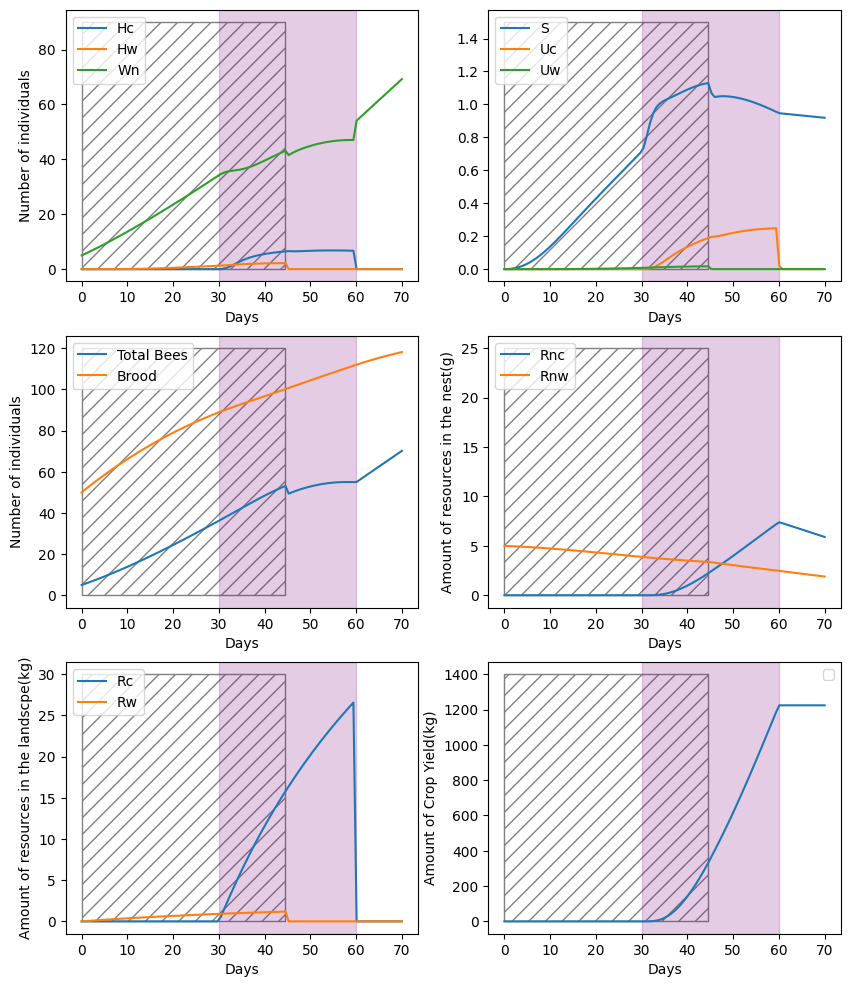

In [3]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import warnings
warnings.filterwarnings('ignore')


Tc_set = [30,60]; Tw_set = [0,45]
#for Tc in Tc_set:
def zcpb(t):
    if t > Tc_set[1]:
        return 10e4
    else:
        return 0
def zwpb(t):
    if t > Tw_set[1]:
        return 10e4
    else:
        return 0
def barrhoc(t):
    if Tc_set[0]<= t <= Tc_set[1]:
        return rhoc;
    else:
        return 0
def barrhow(t):
    if Tw_set[0]<= t <= Tw_set[1]:
        return rhow*(eps+1)
    else:
        return rhow*eps

def H(x):
    if x < 0:
        return 0
    else:
        return 1

def thetap_function(thetahq, thetaa):  # Renamed the function to thetap_function
    x = np.arctan(thetahq - 1)
    return (1 - thetaa) - 2/ np.pi * x * ((1 - thetaa) * H(x)  + thetaa * H(-x))


def FVmay(Hc, Rc):
    return integrate.quad(lambda t: mu * kHU * Rc / (Rc + KHUf) * Hc * ds / rhoc, Tc_set[0], Tc_set[1])[0]

def PSmay(FVmay, nf):
    thetap_value = thetap_function(thetahq, thetaa)  # Evaluate the function
    if FVmay / nf < A * (1 - thetap_value) * ds:
        return FVmay / nf
    else:
        return A * (1 - thetap_value) * ds


def Herani(x, t):
    thetap_value = thetap_function(thetahq, thetaa)  # Renamed the variable to avoid conflict
    # Extract the variables
    Hc, Hw, S, Uc, Uw, Wn, B, Rnc, Rnw, Rc, Rw, TC = x

    dHc = kSH*(thetap_value*Rc)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - kHU*(Rc)/(Rc+KHUf)*Hc - sigmaH*Hc - 100*(t>Tc_set[1])*Hc
    dHw = kSH*((1-thetap_value)*Rw)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - thetah*kHU*(Rw)/(Rw+KHUf)*Hw - sigmaH*Hw + - 100*(t>Tw_set[1])*Hw
    dS = kWnS*((thetap_value*Rc)/(Rc+KWnSf)*(1)/(1+Rnc/KWnSnf) + ((1-thetap_value)*Rw)/(Rw + KWnSf)*(1)/(1+Rnw/KWnSnf))*Wn - kSH*(thetap_value*Rc+(1-thetap_value)*Rw)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - sigmaS*S
    dUc = kHU*(Rc)/(Rc+KHUf)*Hc - kUWn*Uc - sigmaU*Uc
    dUw = thetah * kHU*(Rw)/(Rw+KHUf)*Hw - kUWn*Uw - sigmaU*Uw
    dWn = 4*kBWn*B + kUWn*(Uc+Uw) - (sigmaWn + sigmaRn*(1)/(1+(Rnc+thetaq*Rnw)/Kn))*Wn - kWnS*(thetap_value*Rc/(Rc + KWnSf)*1/(1+Rnc/KWnSf)+((1-thetap_value)*Rw)/(Rw+KWnSf)*1/(1+Rnw/KWnSnf))*Wn + 100*(t>Tc_set[1])*Hc + - 100*(t>Tw_set[1])*Hw;
    dB = 4*rhoB*(Rnc + Rnw)/(Rnc + Rnw+KBnf) - 4*kBWn*B - (sigmaB + sigmaRn*(1)/(1+(Rnc + thetaq*Rnw)/Kn))*B
    dRnc = 1*mu*kUWn*Uc - sigmaWnc*(Rnc)/(Rnc + KWnBnf)*Wn - sigmaBc*(Rnc)/(Rnc + KWnBnf)*B
    dRnw = mu*kUWn*Uw - 1*sigmaWnw*(Rnw)/(Rnw + KWnBnf)*Wn - 1*sigmaBw*(Rnw)/(Rnw + KWnBnf)*B
    dRc = 4*barrhoc(t) - 210*(mu)/((1-thetaa)*A)*kHU*(Rc)/(Rc+KHUf)*Hc - 1*(sigmac+zcpb(t))*Rc
    dRw = barrhow(t) - 1*(mu)/(thetaa*A)*kHU*thetah*(Rw)/(Rw+KHUf)*Hw - 1*(sigmaw+zwpb(t))*Rw
    dTC = wf * fs * PSmay(FVmay(Hc, Rc), nf)
    return [dHc, dHw, dS, dUc, dUw, dWn, dB, dRnc, dRnw, dRc, dRw, dTC]

# Define the parameter values
mu=0.075; nf=1; wf=15; fs=0.0001; ds=1000;

# k's
kWnS=1.3; kSH=19.6; kHU = 1.5;kUWn = 24.9; kBWn = 4e-3;

# Rho's
rhoB = 0.79; rhoc = 0.330 ; rhow = 0.040; eps=0.01;

#sigma's
sigmaWn = 1.5e-3; sigmaS =3e-3; sigmaH = 3e-3; sigmaU = 3e-3; sigmaB = 0.7e-3; sigmaRn = 9.2e-3; sigmac = 20e-3; sigmaw = 20e-3; sigmaWnc = 8.3e-3 ; sigmaWnw =8.3e-3;
sigmaBc =1.3e-3; sigmaBw = 1.3e-3;

A = 600
# kf's
KWnSf = 57.2 ; KSHf = 24.4; KHUf = 16.7 ; KBnf= 0.6;
KWnSnf = 17.1; KWnBnf = 22.5; Kn = 7.1;
thetaa=0.1 ; thetah=2 ; thetaq = 2;

thetahq = 2
# Define the initial conditions
Hc0 = 0
Hw0 = 0
S0 = 0
Uc0 = 0
Uw0 = 0
Wn0 = 5
B0 = 50
Rnc0 = 0
Rnw0 = 5
Rc0 = 0
Rw0 = 0
TC0 = 0
X0 = [Hc0, Hw0, S0, Uc0, Uw0, Wn0, B0, Rnc0, Rnw0, Rc0, Rw0, TC0]

# Set up the time span
t_start = 0
t_end = 70
tspan = np.linspace(t_start, t_end, 100)

X = odeint(Herani, X0, tspan)

# Extract the solution
Hc = X[:, 0]
Hw = X[:, 1]
S = X[:, 2]
Uc = X[:, 3]
Uw = X[:, 4]
Wn = X[:, 5]
B = X[:, 6]
Rnc = X[:, 7]
Rnw = X[:, 8]
Rc = X[:, 9]
Rw = X[:, 10]
TC = X[: , 11]
#plt.figure(figsize=(12, 10))
plt.figure(figsize=(10, 12))
plt.subplot(3,2, 1)
plt.plot(tspan, Hc, label='Hc')
plt.plot(tspan, Hw, label='Hw')
plt.plot(tspan, Wn, label='Wn')
plt.xlabel('Days')
plt.ylabel('Number of individuals')
plt.legend()
plt.fill_between(tspan, 0, 90, where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.subplot(3,2, 2)
plt.plot(tspan, S, label='S')
plt.plot(tspan, Uc, label='Uc')
plt.plot(tspan, Uw, label='Uw')
plt.xlabel('Days')
#plt.ylabel('Number of individuals')
plt.legend()
plt.fill_between(tspan, 0, 1.5, where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.subplot(3,2, 5)
plt.plot(tspan, Rc, label='Rc')
plt.plot(tspan, Rw, label='Rw')
plt.xlabel('Days')
plt.ylabel('Amount of resources in the landscpe(kg)')
plt.legend()
plt.fill_between(tspan, 0, 30, where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.subplot(3,2, 4)
plt.plot(tspan, Rnc, label='Rnc')
plt.plot(tspan, Rnw, label='Rnw')
plt.xlabel('Days')
plt.ylabel('Amount of resources in the nest(g)')
plt.legend()
plt.fill_between(tspan, 0, 25, where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.subplot(3,2, 3)
plt.plot(tspan, S+Hc+Hw+Uc+Uw+Wn, label='Total Bees')
plt.plot(tspan, B, label='Brood')
plt.xlabel('Days')
plt.ylabel('Number of individuals')
plt.legend()
plt.fill_between(tspan, 0, 120, where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.subplot(3,2, 6)
plt.plot(tspan, TC)
#plt.plot(tspan, B, label='Brood')
plt.xlabel('Days')
plt.ylabel('Amount of Crop Yield(kg)')
plt.legend()
plt.fill_between(tspan,0,1400 , where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)

plt.tight_layout
plt.show()


# simulation with the effect of climate change for 1 year

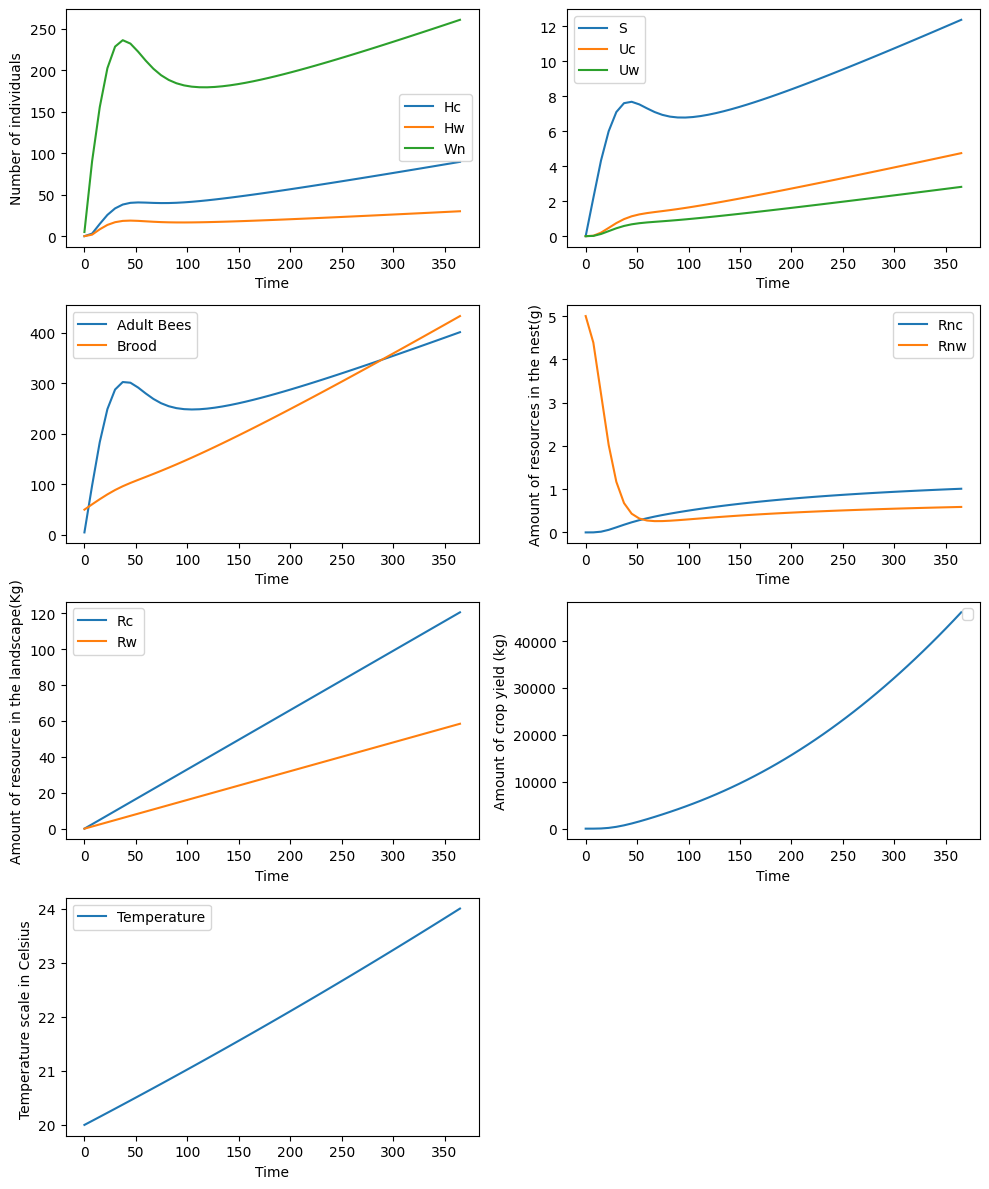

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import warnings
warnings.filterwarnings('ignore')

Tc_set = [0,365]; Tw_set = [0,365]

def zcpb(t):
    if t > Tc_set[1]:
        return 10e4
    else:
        return 0
def zwpb(t):
    if t > Tw_set[1]:
        return 10e4
    else:
        return 0
def barrhoc(t):
    if Tc_set[0]<= t <= Tc_set[1]:
        return rhoc;
    else:
        return 0
def barrhow(t):
    if Tw_set[0]<= t <= Tw_set[1]:
        return rhow*(eps+1)
    else:
        return rhow*eps

def H(x):
    if x < 0:
        return 0
    else:
        return 1

def tempc(T) :
    if T < 29:
        return (alphaRcT*T)/(kRcT+T)
    else:
        return 0.25

def tempw(T):
    if T < 22:
        return (alphaRwT*T)/(kRwT+T)
    else:
        return 0.25
def tempB(T):
    if T < 27:
        return (alphaBT*T)/(kBT+T)
    else:
        return 0

def thetap_function(thetahq, thetaa):  # Renamed the function to thetap_function
    x = np.arctan(thetahq - 1)
    return (1 - thetaa) - 2/ np.pi * x * ((1 - thetaa) * H(x)  + thetaa * H(-x))


def FVmay(Hc, Rc):
    return integrate.quad(lambda t: mu * kHU * Rc / (Rc + KHUf) * Hc * ds / rhoc, Tc_set[0], Tc_set[1])[0]

def PSmay(FVmay, nf):
    thetap_value = thetap_function(thetahq, thetaa)  # Evaluate the function
    if FVmay / nf < A * (1 - thetap_value) * ds:
        return FVmay / nf
    else:
        return A * (1 - thetap_value) * ds


def Herani(x, t):
    thetap_value = thetap_function(thetahq, thetaa)  # Renamed the variable to avoid conflict
    # Extract the variables

    Hc, Hw, S, Uc, Uw, Wn, B, Rnc, Rnw, Rc, Rw, TC, T = x

    dHc = kSH*(thetap_value*Rc)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - kHU*(Rc)/(Rc+KHUf)*Hc - sigmaH*Hc - 100*(t>Tc_set[1])*Hc
    dHw = kSH*((1-thetap_value)*Rw)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - thetah*kHU*(Rw)/(Rw+KHUf)*Hw - sigmaH*Hw + - 100*(t>Tw_set[1])*Hw
    dS = 1*kWnS*((thetap_value*Rc)/(Rc+KWnSf)*(1)/(1+Rnc/KWnSnf) + ((1-thetap_value)*Rw)/(Rw + KWnSf)*(1)/(1+Rnw/KWnSnf))*Wn - kSH*(thetap_value*Rc+(1-thetap_value)*Rw)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - sigmaS*S
    dUc = kHU*(Rc)/(Rc+KHUf)*Hc - kUWn*Uc - sigmaU*Uc
    dUw = thetah * kHU*(Rw)/(Rw+KHUf)*Hw - kUWn*Uw - sigmaU*Uw
    dWn = 60*kBWn*B + kUWn*(Uc+Uw) - (sigmaWn + sigmaRn*(1)/(1+(Rnc+thetaq*Rnw)/Kn))*Wn - 1.5*kWnS*(thetap_value*Rc/(Rc + KWnSf)*1/(1+Rnc/KWnSf)+((1-thetap_value)*Rw)/(Rw+KWnSf)*1/(1+Rnw/KWnSnf))*Wn + 100*(t>Tc_set[1])*Hc + - 100*(t>Tw_set[1])*Hw;
    dB = 2*rhoB*(Rnc + Rnw)/(Rnc + Rnw+KBnf) #- 1*kBWn*B - (sigmaB*(1+tempB(T)) + sigmaRn*(1)/(1+(Rnc + thetaq*Rnw)/Kn))*B
    dRnc = 1*mu*kUWn*Uc - sigmaWnc*(Rnc)/(Rnc + KWnBnf)*Wn - sigmaBc*(Rnc)/(Rnc + KWnBnf)*B
    dRnw = 1*mu*kUWn*Uw - 1*sigmaWnw*(Rnw)/(Rnw + KWnBnf)*Wn - sigmaBw*(Rnw)/(Rnw + KWnBnf)*B
    dRc = rhoc# - (1*(1-thetaa)*A)*kHU*(Rc)/(Rc+KHUf)*Hc - 1*sigmac*(1 + tempc(T)+1*zcpb(t))*Rc
    dRw = 4*rhow #- 1*(mu)/(thetaa*A)*kHU*thetah*(Rw)/(Rw+KHUf)*Hw - sigmaw*(1+tempw(T)+zwpb(t))*Rw
    dTC = wf * fs * PSmay(FVmay(Hc, Rc), nf)

    dT = 400*alphaT*T
    return [dHc, dHw, dS, dUc, dUw, dWn, dB, dRnc, dRnw, dRc, dRw, dTC, dT]

# Define the parameter values
mu=0.001; nf=1; wf=2; fs=0.0009; ds=1000;

#effect of tempreture
kBT = 21; kRcT = 28; kRwT = 26;
alphaBT = 5e-5; alphaRcT = 2.5e-2; alphaRwT = 2e-3; alphaT = 1.25e-6;

# k's
kWnS=1.3; kSH=19.6; kHU = 1.5;kUWn = 24.9; kBWn = 4e-3;

# Rho's
rhoB = 0.79; rhoc = 0.330 ; rhow = 0.040; eps=0.01;

#sigma's
sigmaWn = 1.5e-3; sigmaS =3e-3; sigmaH = 3e-3; sigmaU = 3e-3; sigmaB = 0.7e-3;
sigmaRn = 9.2e-3; sigmac = 20e-3; sigmaw = 20e-3; sigmaWnc = 8.3e-3 ; sigmaWnw =8.3e-3;
sigmaBc =1.3e-3; sigmaBw = 1.3e-3;

A = 600
# kf's
KWnSf = 57.2 ; KSHf = 24.4; KHUf = 16.7 ; KBnf= 0.6;
KWnSnf = 17.1; KWnBnf = 22.5; Kn = 7.1;
thetaa=0.1 ; thetah=2 ; thetaq = 2;

thetahq = 2
# Define the initial conditions
Hc0 = 0
Hw0 = 0
S0 = 0
Uc0 = 0
Uw0 = 0
Wn0 = 5
B0 = 50
Rnc0 = 0
Rnw0 = 5
Rc0 = 0
Rw0 = 0
TC0 = 0
T0 = 20
X0 = [Hc0, Hw0, S0, Uc0, Uw0, Wn0, B0, Rnc0, Rnw0, Rc0, Rw0, TC0, T0]

# Set up the time span
t_start = 0
t_end = 365
tspan = np.linspace(t_start, t_end, 50)

X = odeint(Herani, X0, tspan)

# Extract the solution
Hc = X[:, 0]
Hw = X[:, 1]
S = X[:, 2]
Uc = X[:, 3]
Uw = X[:, 4]
Wn = X[:, 5]
B = X[:, 6]
Rnc = X[:, 7]
Rnw = X[:, 8]
Rc = X[:, 9]
Rw = X[:, 10]
TC = X[: , 11]
T = X[:, 12]
plt.figure(figsize=(10, 12))
# PLOTTING
plt.subplot(4,2, 1)
plt.plot(tspan, Hc, label='Hc')
plt.plot(tspan, Hw, label='Hw')
plt.plot(tspan, Wn, label='Wn')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.legend()


plt.subplot(4,2, 2)
plt.plot(tspan, S, label='S')
plt.plot(tspan, Uc, label='Uc')
plt.plot(tspan, Uw, label='Uw')
plt.xlabel('Time')
plt.legend()


plt.subplot(4,2, 6)
plt.plot(tspan, TC)
plt.xlabel('Time')
plt.ylabel('Amount of crop yield (kg)')
plt.legend()


plt.subplot(4,2, 4)
plt.plot(tspan, Rnc, label='Rnc')
plt.plot(tspan, Rnw, label='Rnw')
plt.xlabel('Time')
plt.ylabel('Amount of resources in the nest(g)')
plt.legend()

plt.subplot(4,2, 3)
plt.plot(tspan, S+Hc+Hw+Uc+Uw+Wn, label='Adult Bees')
plt.plot(tspan, B, label='Brood')
plt.xlabel('Time')
plt.legend()


plt.subplot(4,2, 5)
plt.plot(tspan, Rc, label='Rc')
plt.plot(tspan, Rw, label='Rw')
plt.xlabel('Time')
plt.ylabel('Amount of resource in the landscape(Kg)')
plt.legend()

#plt.figure(figsize=(10,8))
plt.subplot(4,2, 7)
plt.plot(tspan, T, label='Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature scale in Celsius ')
plt.legend()


plt.tight_layout()
plt.show()


# simulation with the effect of climate change for 10 years

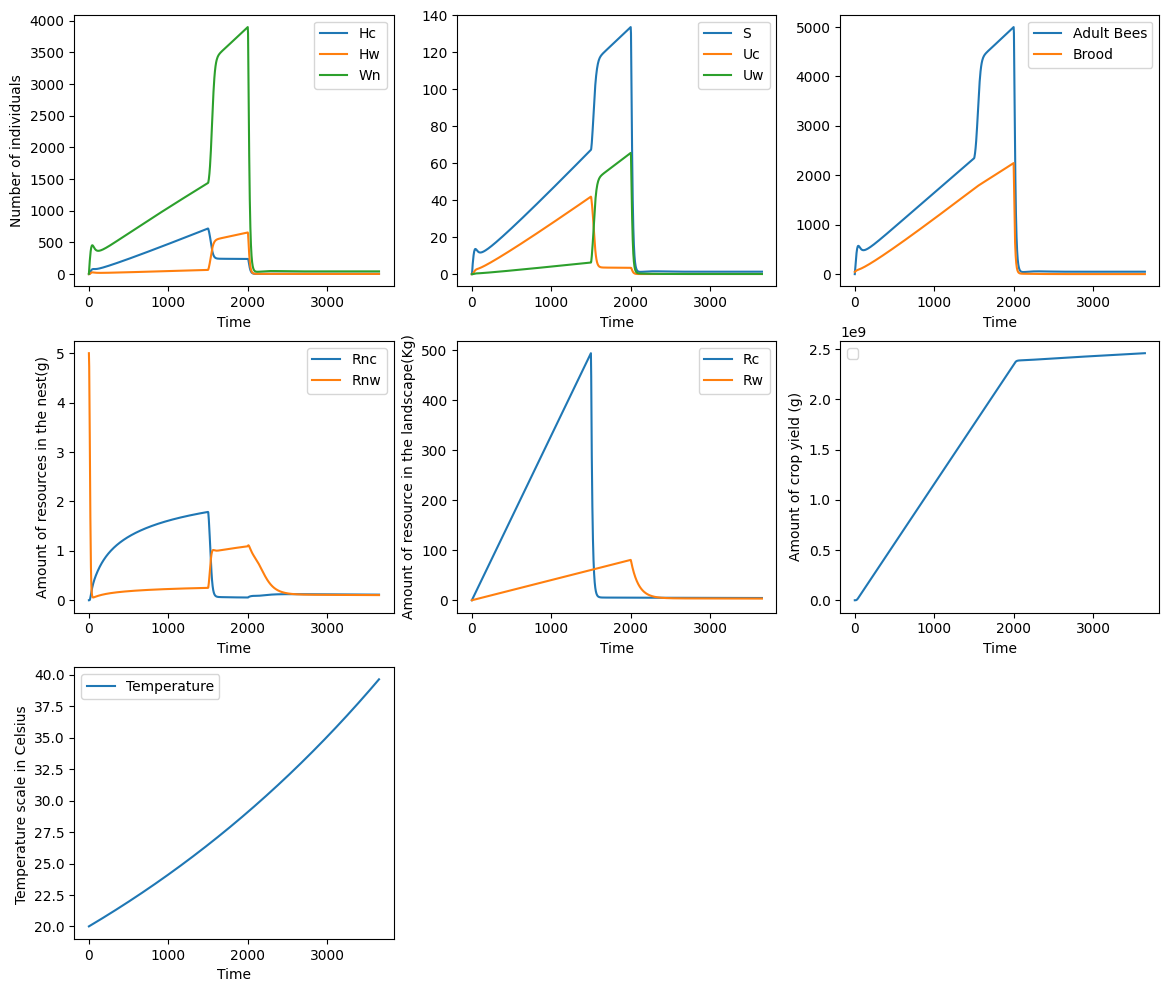

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import warnings
warnings.filterwarnings('ignore')

Tc_set = [0,3650]; Tw_set = [0,3650]
a=[1500,3650]
b=[2000,3650]

def zcpb(t):
    if t > Tc_set[1]:
        return 10e4
    else:
        return 0
def zwpb(t):
    if t > Tw_set[1]:
        return 10e4
    else:
        return 0
def barrhoc(t):
    if Tc_set[0]<= t <= Tc_set[1]:
        return rhoc;
    else:
        return 0
def barrhow(t):
    if Tw_set[0]<= t <= Tw_set[1]:
        return rhow*(eps+1)
    else:
        return rhow*eps

def H(x):
    if x < 0:
        return 0
    else:
        return 1



def thetap_function(thetahq, thetaa):  # Renamed the function to thetap_function
    x = np.arctan(thetahq - 1)
    return (1 - thetaa) - 2/ np.pi * x * ((1 - thetaa) * H(x)  + thetaa * H(-x))


def FVmay(Hc, Rc):
    return integrate.quad(lambda t: mu * kHU * Rc / (Rc + KHUf) * Hc * ds / rhoc, a[0], a[1])[0]

def PSmay(FVmay, nf):
    thetap_value = thetap_function(thetahq, thetaa)  # Evaluate the function
    if FVmay / nf < A * (1 - thetap_value) * ds:
        return FVmay / nf
    else:
        return A * (1 - thetap_value) * ds
def tempc(T):
    if T < 29:
        return (alphaRcT * T) / (kRcT + T)
    else:
        return -(alphaRcT * T) / (kRcT + T)

def tempw(T):
    if T < 29:
        return (alphaRwT * T) / (kRwT + T)
    else:
        return -(alphaRwT * T) / (kRwT + T)

def tempB(T):
    if T < 27:
        return (alphaBT*T)/(kBT+T)
    else:
        return 0

def Herani(x, t):
    thetap_value = thetap_function(thetahq, thetaa)  # Renamed the variable to avoid conflict
    # Extract the variables

    Hc, Hw, S, Uc, Uw, Wn, B, Rnc, Rnw, Rc, Rw, TC, T = x

    dHc = kSH*(thetap_value*Rc)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - kHU*(Rc)/(Rc+KHUf)*Hc - sigmaH*Hc - 100*(t>Tc_set[1])*Hc
    dHw = kSH*((1-thetap_value)*Rw)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - thetah*kHU*(Rw)/(Rw+KHUf)*Hw - sigmaH*Hw + - 100*(t>Tw_set[1])*Hw
    dS = 1*kWnS*((thetap_value*Rc)/(Rc+KWnSf)*(1)/(1+Rnc/KWnSnf) + ((1-thetap_value)*Rw)/(Rw + KWnSf)*(1)/(1+Rnw/KWnSnf))*Wn - kSH*(thetap_value*Rc+(1-thetap_value)*Rw)/(thetap_value*Rc+(1-thetap_value)*Rw+KSHf)*S - sigmaS*S
    dUc = kHU*(Rc)/(Rc+KHUf)*Hc - kUWn*Uc - sigmaU*Uc
    dUw = thetah * kHU*(Rw)/(Rw+KHUf)*Hw - kUWn*Uw - sigmaU*Uw
    dWn = 100*kBWn*B + kUWn*(Uc+Uw) - (sigmaWn + sigmaRn*(1)/(1+(Rnc+thetaq*Rnw)/Kn))*Wn - 1.5*kWnS*(thetap_value*Rc/(Rc + KWnSf)*1/(1+Rnc/KWnSf)+((1-thetap_value)*Rw)/(Rw+KWnSf)*1/(1+Rnw/KWnSnf))*Wn + 100*(t>Tc_set[1])*Hc + - 100*(t>Tw_set[1])*Hw;
    dB = 2*rhoB*(Rnc + Rnw)/(Rnc + Rnw+KBnf)- 500*(b[0]< t< b[1]) *B*(alphaBT*T)/(kBT+T)*Rc#- 1*kBWn*B - (sigmaB*(1+tempB(T)) + sigmaRn*(1)/(1+(Rnc + thetaq*Rnw)/Kn))*B
    dRnc = 1*mu*kUWn*Uc - sigmaWnc*(Rnc)/(Rnc + KWnBnf)*Wn - sigmaBc*(Rnc)/(Rnc + KWnBnf)*B
    dRnw = 1*mu*kUWn*Uw - 1*sigmaWnw*(Rnw)/(Rnw + KWnBnf)*Wn - sigmaBw*(Rnw)/(Rnw + KWnBnf)*B
    dRc = 1*barrhoc(t) - 5*(a[0]< t< a[1])*Rc *(alphaRcT*T)/(kRcT+T)#- (1*(1-thetaa)*A)*kHU*(Rc)/(Rc+KHUf)*Hc - 1*sigmac*(1 + tempc(T)+1*zcpb(t))*Rc
    dRw = 1*barrhow(t) -10*(b[0]< t< b[1])*Rw *(alphaRwT*T)/(kRwT+T)#- 1*(mu)/(thetaa*A)*kHU*thetah*(Rw)/(Rw+KHUf)*Hw - sigmaw*(1+tempw(T)+zwpb(t))*Rw
    dTC = wf * fs * PSmay(FVmay(Hc, Rc), nf)

    dT = 150*alphaT*T
    return [dHc, dHw, dS, dUc, dUw, dWn, dB, dRnc, dRnw, dRc, dRw, dTC, dT]

# Define the parameter values
mu=0.001; nf=1; wf=4; fs=0.9; ds=1000;

#effect of tempreture
kBT = 21; kRcT = 28; kRwT = 26;
alphaBT = 5e-5; alphaRcT = 2.5e-2; alphaRwT = 2e-3; alphaT = 1.25e-6;

# k's
kWnS=1.3; kSH=19.6; kHU = 1.5;kUWn = 24.9; kBWn = 4e-3;

# Rho's
rhoB = 0.79; rhoc = 0.330 ; rhow = 0.040; eps=0.01;

#sigma's
sigmaWn = 1.5e-3; sigmaS =3e-3; sigmaH = 3e-3; sigmaU = 3e-3; sigmaB = 0.7e-3;
sigmaRn = 9.2e-3; sigmac = 20e-3; sigmaw = 20e-3; sigmaWnc = 8.3e-3 ; sigmaWnw =8.3e-3;
sigmaBc =1.3e-3; sigmaBw = 1.3e-3;

A = 600
# kf's
KWnSf = 57.2 ; KSHf = 24.4; KHUf = 16.7 ; KBnf= 0.6;
KWnSnf = 17.1; KWnBnf = 22.5; Kn = 7.1;
thetaa=0.1 ; thetah=2 ; thetaq = 2;

thetahq = 2
# Define the initial conditions
Hc0 = 0
Hw0 = 0
S0 = 0
Uc0 = 0
Uw0 = 0
Wn0 = 5
B0 = 50
Rnc0 = 0
Rnw0 = 5
Rc0 = 0
Rw0 = 0
TC0 = 0
T0 = 20
X0 = [Hc0, Hw0, S0, Uc0, Uw0, Wn0, B0, Rnc0, Rnw0, Rc0, Rw0, TC0, T0]

# Set up the time span
t_start = 0
t_end = 3650
tspan = np.linspace(t_start, t_end, 1000)

X = odeint(Herani, X0, tspan)

# Extract the solution
Hc = X[:, 0]
Hw = X[:, 1]
S = X[:, 2]
Uc = X[:, 3]
Uw = X[:, 4]
Wn = X[:, 5]
B = X[:, 6]
Rnc = X[:, 7]
Rnw = X[:, 8]
Rc = X[:, 9]
Rw = X[:, 10]
TC = X[: , 11]
T = X[:, 12]
plt.figure(figsize=(14, 12))

plt.subplot(3,3, 1)
plt.plot(tspan, Hc, label='Hc')
plt.plot(tspan, Hw, label='Hw')
plt.plot(tspan, Wn, label='Wn')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.legend()


plt.subplot(3,3, 2)
plt.plot(tspan, S, label='S')
plt.plot(tspan, Uc, label='Uc')
plt.plot(tspan, Uw, label='Uw')
plt.xlabel('Time')
plt.legend()


plt.subplot(3,3, 6)
plt.plot(tspan, TC)
plt.xlabel('Time')
plt.ylabel('Amount of crop yield (g)')
plt.legend()


plt.subplot(3,3, 4)
plt.plot(tspan, Rnc, label='Rnc')
plt.plot(tspan, Rnw, label='Rnw')
plt.xlabel('Time')
plt.ylabel('Amount of resources in the nest(g)')
plt.legend()

plt.subplot(3,3, 3)
plt.plot(tspan, S+Hc+Hw+Uc+Uw+Wn, label='Adult Bees')
plt.plot(tspan, B, label='Brood')
plt.xlabel('Time')
plt.legend()


plt.subplot(3,3, 5)
plt.plot(tspan, Rc, label='Rc')
plt.plot(tspan, Rw, label='Rw')
plt.xlabel('Time')
plt.ylabel('Amount of resource in the landscape(Kg)')
plt.legend()


plt.subplot(3,3, 7)
plt.plot(tspan, T, label='Temperature')
plt.xlabel('Time')
plt.ylabel('Temperature scale in Celsius ')
plt.legend()



plt.show()


# simulation for two season aznd different blooming time

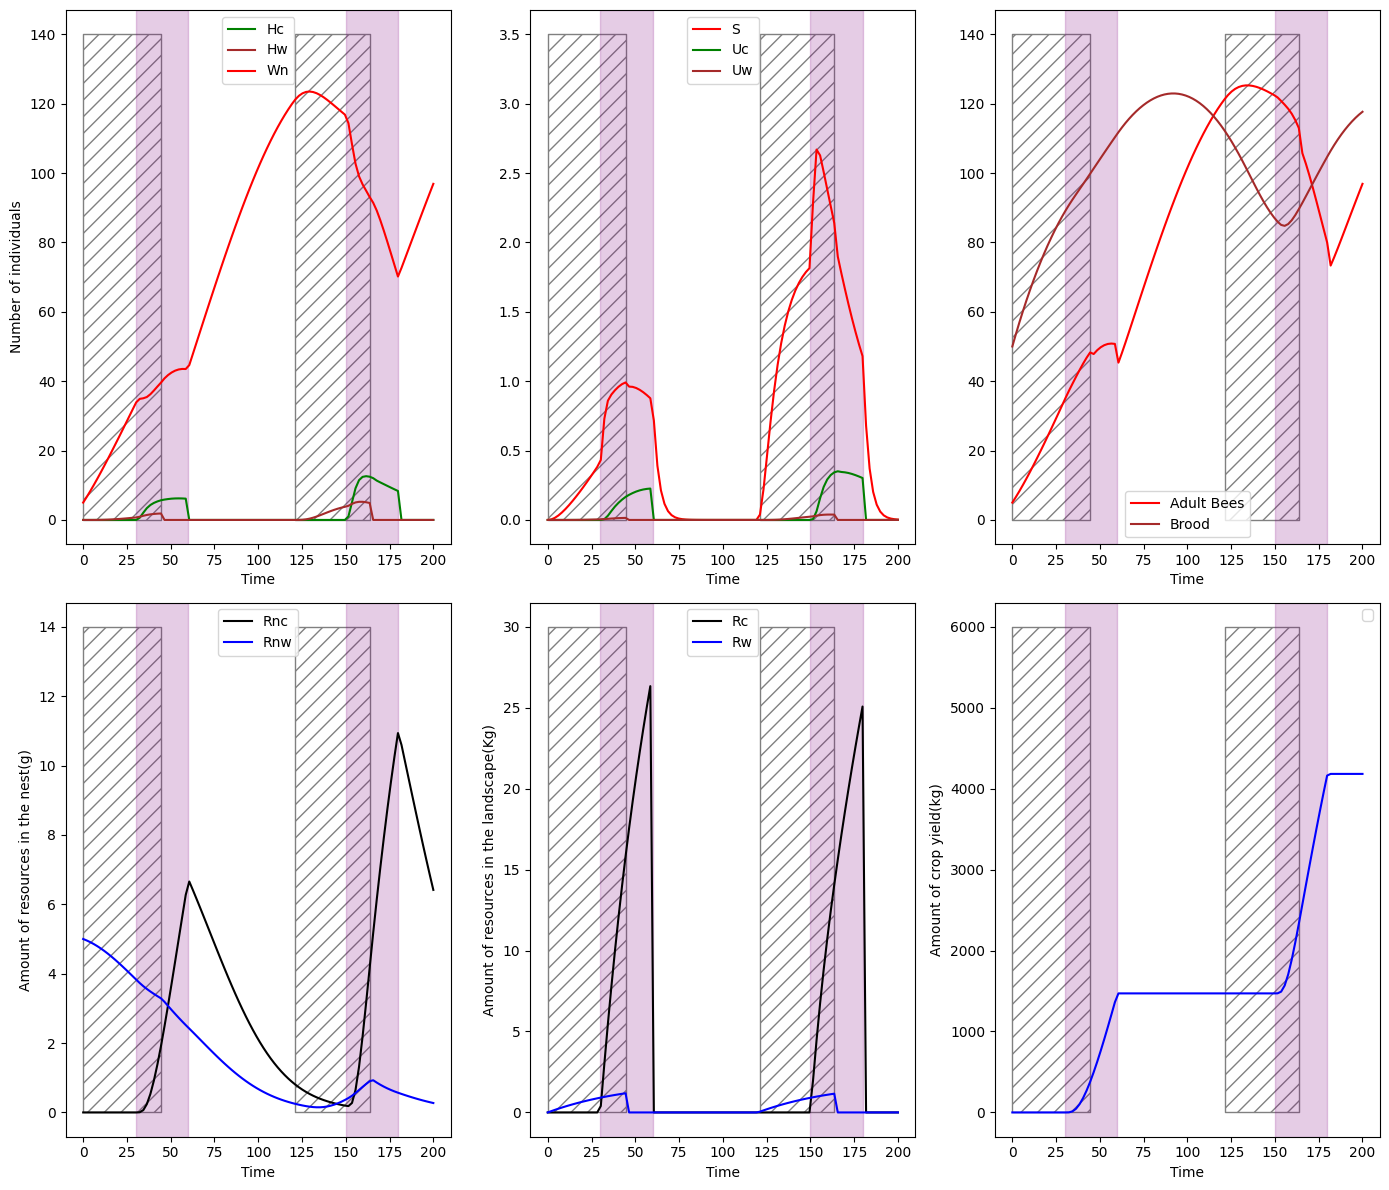

In [ ]:
import numpy as np
from scipy import integrate

Tc_set = [[30, 60], [150, 180]]
Tw_set = [[0, 45], [120, 165]]

def zcpb(t):
    if t > Tc_set[0][1] and t < Tc_set[1][0] or t > Tc_set[1][1]:
        return 10e4
    else:
        return 0

def zwpb(t):
    if t > Tw_set[0][1] and t < Tw_set[1][0] or t > Tw_set[1][1]:
        return 10e4
    else:
        return 0

def barrhoc(t):
    if (Tc_set[0][0] <= t <= Tc_set[0][1]) or (Tc_set[1][0] <= t <= Tc_set[1][1]):
        return rhoc
    else:
        return 0

def barrhow(t):
    if (Tw_set[0][0] <= t <= Tw_set[0][1]) or (Tw_set[1][0] <= t <= Tw_set[1][1]):
        return rhow * (eps + 1)
    else:
        return rhow * eps

def H(x):
    if x < 0:
        return 0
    else:
        return 1

def thetap_function(thetahq, thetaa):
    x = np.arctan(thetahq - 1)
    return (1 - thetaa) - 2 / np.pi * x * ((1 - thetaa) * H(x) + thetaa * H(-x))


def FVmay(Hc, Rc):
    return integrate.quad(lambda t: mu * kHU * Rc / (Rc + KHUf) * Hc * ds / rhoc, Tc_set[0][0], Tc_set[1][1] )[0]

def PSmay(FVmay, nf):
    thetap_value = thetap_function(thetahq, thetaa)
    if FVmay / nf < A * (1 - thetap_value) * ds:
        return FVmay / nf
    else:
        return A * (1 - thetap_value) * ds


def Herani(x, t):
    thetap_value = thetap_function(thetahq, thetaa)
    Hc, Hw, S, Uc, Uw, Wn, B, Rnc, Rnw, Rc, Rw, TC = x

    dHc = kSH * (thetap_value * Rc) / (thetap_value * Rc + (1 - thetap_value) * Rw + KSHf) * S - kHU * (Rc) / (
            Rc + KHUf) * Hc - sigmaH * Hc - 100 * (t > Tc_set[0][1] and t<Tc_set[1][0] or t > Tc_set[1][1] ) * Hc
    dHw = kSH * ((1 - thetap_value) * Rw) / (thetap_value * Rc + (1 - thetap_value) * Rw + KSHf) * S - thetah * kHU * (
            Rw) / (Rw + KHUf) * Hw - sigmaH * Hw + -100 * (t > Tw_set[0][1] and t<Tw_set[1][0] or t > Tw_set[1][1]) * Hw
    dS = kWnS * (
                (thetap_value * Rc) / (Rc + KWnSf) * (1) / (1 + Rnc / KWnSnf) +
                ((1 - thetap_value) * Rw) / (Rw + KWnSf) * (1) / (1 + Rnw / KWnSnf)) * Wn - 1*kSH * (
                     thetap_value * Rc + (1 - thetap_value) * Rw) / (
                     thetap_value * Rc + (1 - thetap_value) * Rw + KSHf) * S - 10* sigmaS * S
    dUc = kHU * (Rc) / (Rc + KHUf) * Hc - kUWn * Uc - sigmaU * Uc
    dUw = thetah * kHU * (Rw) / (Rw + KHUf) * Hw - kUWn * Uw - sigmaU * Uw
    dWn = 4 * kBWn * B+ kUWn * (Uc + Uw) - 1*(
            sigmaWn + sigmaRn * (1) / (1 + (Rnc + thetaq * Rnw) / Kn)) * Wn - kWnS * (
                     thetap_value * Rc / (Rc + KWnSf) * 1 / (1 + Rnc / KWnSf) +
                     ((1 - thetap_value) * Rw) / (Rw + KWnSf) * 1 / (1 + Rnw / KWnSnf)) * Wn +  (
                     t > Tc_set[0][1] and t<Tc_set[1][0] or t>Tc_set[1][1]) * Hc + 4 * (t > Tw_set[0][1] and t<Tw_set[1][0] or t>Tw_set[1][1]) * Hw
    dB = 4 * rhoB * (Rnc + Rnw) / (Rnc + Rnw + KBnf) - 4 * kBWn * B - (
            sigmaB + sigmaRn * (1) / (1 + (Rnc + thetaq * Rnw) / Kn)) * B
    dRnc =  mu * kUWn * Uc - sigmaWnc * (Rnc) / (Rnc + KWnBnf) * Wn - sigmaBc * (Rnc) / (Rnc + KWnBnf) * B
    dRnw = mu * kUWn * Uw -  sigmaWnw * (Rnw) / (Rnw + KWnBnf) * Wn - 1 * sigmaBw * (Rnw) / (Rnw + KWnBnf) * B
    dRc = 4 * barrhoc(t) - 210 * (mu) / ((1 - thetaa) * A) * kHU * (Rc) / (Rc + KHUf) * Hc -   (sigmac + zcpb(t)) * Rc
    dRw = barrhow(t) -  (mu) / (thetaa * A) * kHU * thetah * (Rw) / (Rw + KHUf) * Hw -  (sigmaw + zwpb(t)) * Rw
    dTC = wf * fs * PSmay(FVmay(Hc, Rc), nf)
    return [dHc, dHw, dS, dUc, dUw, dWn, dB, dRnc, dRnw, dRc, dRw, dTC]

# Define the parameter values
mu=0.075; nf=1; wf=1; fs=0.0004; ds=1000;

# k's
kWnS=1.3; kSH=19.6; kHU = 1.5;kUWn = 24.9; kBWn = 4e-3;

# Rho's
rhoB = 0.79; rhoc = 0.330 ; rhow = 0.040; eps=0.01;

#sigma's
sigmaWn = 1.5e-3; sigmaS =3e-2; sigmaH = 3e-3; sigmaU = 3e-3; sigmaB = 0.7e-3; sigmaRn = 9.2e-3; sigmac = 20e-3; sigmaw = 20e-3; sigmaWnc = 8.3e-3 ; sigmaWnw =8.3e-3;
sigmaBc =1.3e-3; sigmaBw = 1.3e-3;

A = 600
# kf's
KWnSf = 57.2 ; KSHf = 24.4; KHUf = 16.7 ; KBnf= 0.6;
KWnSnf = 17.1; KWnBnf = 22.5; Kn = 7.1;
thetaa=0.1 ; thetah=2 ; thetaq = 2;

thetahq = 2
# Define the initial conditions
Hc0 = 0
Hw0 = 0
S0 = 0
Uc0 = 0
Uw0 = 0
Wn0 = 5
B0 = 50
Rnc0 = 0
Rnw0 = 5
Rc0 = 0
Rw0 = 0
TC0 = 0
X0 = [Hc0, Hw0, S0, Uc0, Uw0, Wn0, B0, Rnc0, Rnw0, Rc0, Rw0, TC0]

# Set up the time span
t_start = 0
t_end = 200
tspan = np.linspace(t_start, t_end, 100)

X = odeint(Herani, X0, tspan)

# Extract the solution
Hc = X[:, 0]
Hw = X[:, 1]
S = X[:, 2]
Uc = X[:, 3]
Uw = X[:, 4]
Wn = X[:, 5]
B = X[:, 6]
Rnc = X[:, 7]
Rnw = X[:, 8]
Rc = X[:, 9]
Rw = X[:, 10]
TC = X[: , 11]
plt.figure(figsize=(14, 12))
plt.subplot(2,3, 1)
plt.plot(tspan, Hc, label='Hc', color = 'green')
plt.plot(tspan, Hw, label='Hw', color = 'brown')
plt.plot(tspan, Wn, label='Wn', color = 'red')
plt.xlabel('Time')
plt.ylabel('Number of individuals')
plt.legend()
plt.fill_between(tspan,0,140, where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)
plt.fill_between(tspan,0,140 , where=(tspan >= 120) & (tspan <= 165), color='none', edgecolor='gray', hatch='//')
plt.axvspan(150, 180, color='purple', alpha=0.2)
plt.subplot(2,3, 2)
plt.plot(tspan, S, label='S', color = 'red')
plt.plot(tspan, Uc, label='Uc', color = 'green')
plt.plot(tspan, Uw, label='Uw', color = 'brown')
plt.xlabel('Time')
#plt.ylabel('Number of individuals')
plt.legend()
plt.fill_between(tspan,0,3.5 , where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)
plt.fill_between(tspan,0,3.5 , where=(tspan >= 120) & (tspan <= 165), color='none', edgecolor='gray', hatch='//')
plt.axvspan(150, 180, color='purple', alpha=0.2)

plt.subplot(2,3, 3)
plt.plot(tspan, S+Hc+Hw+Uc+Uw+Wn, label='Adult Bees', color = 'red')
plt.plot(tspan, B, label='Brood', color = 'brown')
plt.xlabel('Time')
#plt.ylabel('Resources')
plt.legend()
plt.fill_between(tspan,0,140 , where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)
plt.fill_between(tspan,0,140 , where=(tspan >= 120) & (tspan <= 165), color='none', edgecolor='gray', hatch='//')
plt.axvspan(150, 180, color='purple', alpha=0.2)

plt.subplot(2,3, 4)
plt.plot(tspan, Rnc, label='Rnc', color='black')
plt.plot(tspan, Rnw, label='Rnw', color = 'blue')
plt.xlabel('Time')
plt.ylabel('Amount of resources in the nest(g)')
plt.legend()
plt.fill_between(tspan,0,14 , where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)
plt.fill_between(tspan,0,14 , where=(tspan >= 120) & (tspan <= 165), color='none', edgecolor='gray', hatch='//')
plt.axvspan(150, 180, color='purple', alpha=0.2)

plt.subplot(2,3, 5)
plt.plot(tspan, Rc, label='Rc', color = 'black')
plt.plot(tspan, Rw, label='Rw', color = 'blue')
plt.xlabel('Time')
plt.ylabel('Amount of resources in the landscape(Kg)')
plt.legend()
plt.fill_between(tspan,0,30 , where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)
plt.fill_between(tspan,0,30 , where=(tspan >= 120) & (tspan <= 165), color='none', edgecolor='gray', hatch='//')
plt.axvspan(150, 180, color='purple', alpha=0.2)

plt.subplot(2,3, 6)
plt.plot(tspan, TC, color = 'blue')
#plt.plot(tspan, B, label='Brood')
plt.xlabel('Time')
plt.ylabel('Amount of crop yield(kg)')
plt.legend()
plt.fill_between(tspan,0,6000 , where=(tspan >= 0) & (tspan <= 45), color='none', edgecolor='gray', hatch='//')
plt.axvspan(30, 60, color='purple', alpha=0.2)
plt.fill_between(tspan,0,6000 , where=(tspan >= 120) & (tspan <= 165), color='none', edgecolor='gray', hatch='//')
plt.axvspan(150, 180, color='purple', alpha=0.2)

plt.tight_layout()
plt.show()